<a href="https://colab.research.google.com/github/rishikaa1/handwritten-digit-recognition/blob/main/svm_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the MNIST dataset


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Visualizing the dataset

In [ ]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist['data'].shape

(70000, 784)

In [ ]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
mnist['target'].shape

(70000,)

Displaying the total number of samples of labels 0-9

In [ ]:
mnist.target.astype('category').value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

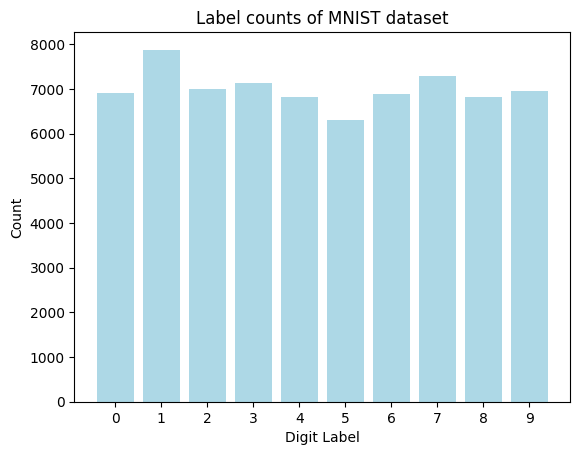

In [ ]:
label_counts = mnist.target.value_counts().sort_index()
plt.bar(label_counts.index.astype(int), label_counts.values, color = 'lightblue')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.title('Label counts of MNIST dataset')
plt.xticks(range(10))
plt.show()

Defining matrix of features 'X' and target vector 'y'

In [ ]:
X = mnist['data']
y = mnist['target']


In [ ]:
print(X.shape)

(70000, 784)


In [ ]:
print(X)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [ ]:
print(y.shape)

(70000,)


In [ ]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Displaying the first three images of X

(-0.5, 27.5, 27.5, -0.5)

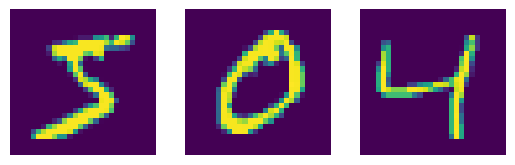

In [ ]:
digit = X.iloc[0]
digit_pixels = np.array(digit).reshape(28,28)
plt.subplot(131)
plt.imshow(digit_pixels)
plt.axis('off')

digit = X.iloc[1]
digit_pixels = np.array(digit).reshape(28,28)
plt.subplot(132)
plt.imshow(digit_pixels)
plt.axis('off')

digit = X.iloc[2]
digit_pixels = np.array(digit).reshape(28,28)
plt.subplot(133)
plt.imshow(digit_pixels)
plt.axis('off')



Normalising X

In [ ]:
X = X/255.0
print("X: ", X.shape)

X:  (70000, 784)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Splitting the MNIST dataset into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


Building the Linear SVM Model

Training the model

In [ ]:
from sklearn.svm import SVC
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

Predicting the target values after training

In [ ]:
y_pred_1 = model_linear.predict(X_test)

Accuracy and confusion matrix of the linear model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy: ", accuracy_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))

Accuracy:  0.9207857142857143
[[1299    1    4    1    3   14   10    2    7    2]
 [   0 1563    5    7    1    3    0    5   12    4]
 [   8   13 1269   22   16    8   10    7   22    5]
 [   3    3   36 1302    3   47    1    9   19   10]
 [   5    3   15    2 1214    4    5    6    3   38]
 [  13   10   12   52    9 1124   21    1   20   11]
 [  11    3   29    2   17   31 1300    1    2    0]
 [   1    6   24   13   23    7    0 1404    2   23]
 [  15   26   26   54    6   44   10   10 1152   14]
 [   7   11   10   18   51    8    0   40   11 1264]]


In [ ]:
report = classification_report(y_test, y_pred_1)
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.95      0.98      0.97      1600
           2       0.89      0.92      0.90      1380
           3       0.88      0.91      0.90      1433
           4       0.90      0.94      0.92      1295
           5       0.87      0.88      0.88      1273
           6       0.96      0.93      0.94      1396
           7       0.95      0.93      0.94      1503
           8       0.92      0.85      0.88      1357
           9       0.92      0.89      0.91      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

